In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets 
import matplotlib.pyplot as plt

In [ ]:
iris = datasets.load_iris()
iris.data

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
cov_data = np.corrcoef(iris.data.T)
cov_data

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

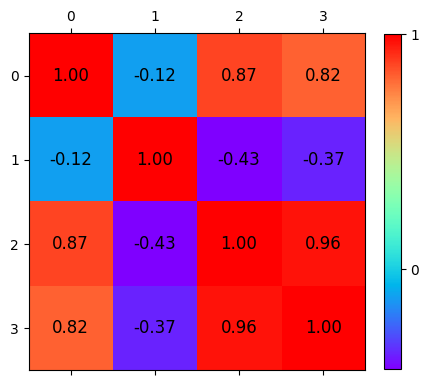

In [ ]:
img = plt.matshow(cov_data, cmap=plt.cm.rainbow)
plt.colorbar(img, ticks = [-1, 0, 1], fraction=0.045)
for x in range(cov_data.shape[0]):
    for y in range(cov_data.shape[1]):
        plt.text(x, y, "%0.2f" % cov_data[x,y], size=12, color='black', ha="center", va="center")
        
plt.show()

In [ ]:
import pandas as pd
import numpy as np
matrix = np.array([[0, 3, 4], [1, 2, 4], [3, 4, 5]]) 
matrix

array([[0, 3, 4],
       [1, 2, 4],
       [3, 4, 5]])

In [ ]:
np.cov(matrix)

array([[4.33333333, 2.83333333, 2.        ],
       [2.83333333, 2.33333333, 1.5       ],
       [2.        , 1.5       , 1.        ]])

In [ ]:
matrix_a = np.array([[0.1, .32, .2,  0.4, 0.8], 
             [.23, .18, .56, .61, .12], 
             [.9,   .3,  .6,  .5,  .3],  
             [.34, .75, .91, .19, .21]])

In [ ]:
np.corrcoef(matrix_a.T)

array([[ 1.        , -0.03783885,  0.34905716,  0.14648975, -0.34945863],
       [-0.03783885,  1.        ,  0.67888519, -0.96102583, -0.12757741],
       [ 0.34905716,  0.67888519,  1.        , -0.45104803, -0.80429469],
       [ 0.14648975, -0.96102583, -0.45104803,  1.        , -0.15132323],
       [-0.34945863, -0.12757741, -0.80429469, -0.15132323,  1.        ]])

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['class'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
x = df.drop(labels='class', axis=1).values
y = df['class'].values

In [ ]:
class convers_pca():
    def __init__(self, no_of_components):
        self.no_of_components = no_of_components
        self.eigen_values = None
        self.eigen_vectors = None
        
    def transform(self, x):
        return np.dot(x - self.mean, self.projection_matrix.T)
    
    def inverse_transform(self, x):
        return np.dot(x, self.projection_matrix) + self.mean
    
    def fit(self, x):
        self.no_of_components = x.shape[1] if self.no_of_components is None else self.no_of_components
        self.mean = np.mean(x, axis=0)
        
        cov_matrix = np.cov(x - self.mean, rowvar=False)
        
        self.eigen_values, self.eigen_vectors = np.linalg.eig(cov_matrix)
        self.eigen_vectors = self.eigen_vectors.T
        
        self.sorted_components = np.argsort(self.eigen_values)[::-1]
        
        self.projection_matrix = self.eigen_vectors[self.sorted_components[:self.no_of_components]]
        self.explained_variance = self.eigen_values[self.sorted_components]
        self.explained_variance_ratio = self.explained_variance / self.eigen_values.sum()

In [ ]:
std = StandardScaler()
transformed = StandardScaler().fit_transform(x)

In [ ]:
pca = convers_pca(no_of_components=2)
pca.fit(transformed)

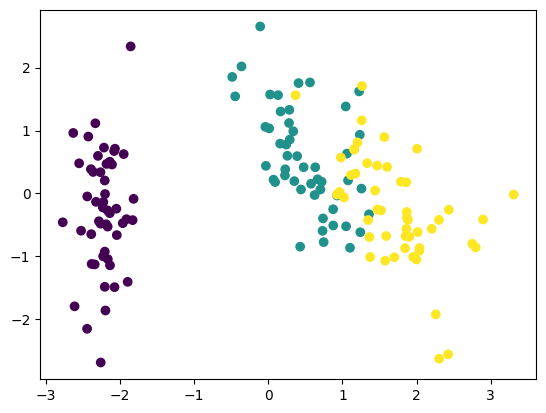

In [ ]:
x_std = pca.transform(transformed)
plt.figure()
plt.scatter(x_std[:, 0], x_std[:, 1], c=y)